## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
from keras.layers import Dropout

def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128] , drp_ratio = 0.2):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)            
            x = keras.layers.Dense(units = n_units, activation='relu', name = 'hidden_layer'+ str(i+1))(x)
            x = Dropout(drp_ratio)(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units = n_units, activation='relu', name = 'hidden_layer'+ str(i+1))(x)

            x = Dropout(drp_ratio)(x)
                
    out = keras.layers.Dense(units = output_units, activation= 'softmax', name = 'output')(x)        
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model
    return model

In [6]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [512, 256, 128]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for Batch_Size in BATCH_SIZE:
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()

    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)


    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size = Batch_Size,
              validation_data = (x_test, y_test),
              shuffle = True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    name_tag = 'Batch_Size_%.2f' % Batch_Size
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}


W0719 19:18:51.196326  8972 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 19:18:51.431266  8972 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 19:18:51.767971  8972 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 19:18:51.806955  8972 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 19:18:51.861783  8972 deprecation.py:506] From C:\Anaconda3\lib\site-packages\keras\back

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

W0719 19:18:52.810220  8972 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 354us/step - loss: 2.2805 - acc: 0.2291 - val_loss: 1.7842 - val_acc: 0.3740
Epoch 2/50
50000/50000 [==============================] - 15s 290us/step - loss: 1.9184 - acc: 0.3285 - val_loss: 1.6668 - val_acc: 0.4154
Epoch 3/50
50000/50000 [==============================] - 15s 298us/step - loss: 1.8130 - acc: 0.3610 - val_loss: 1.6063 - val_acc: 0.4342
Epoch 4/50
50000/50000 [==============================] - 14s 290us/step - loss: 1.7443 - acc: 0.3816 - val_loss: 1.5677 - val_acc: 0.4496
Epoch 5/50
50000/50000 [==============================] - 15s 297us/step - loss: 1.6947 - acc: 0.3972 - val_loss: 1.5345 - val_acc: 0.4625
Epoch 6/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.6560 - acc: 0.4117 - val_loss: 1.5062 - val_acc: 0.4695
Epoch 7/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.6216 - acc: 0.4238 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 375us/step - loss: 2.1060 - acc: 0.2747 - val_loss: 1.6804 - val_acc: 0.4070
Epoch 2/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.7977 - acc: 0.3617 - val_loss: 1.5809 - val_acc: 0.4400
Epoch 3/50
50000/50000 [==============================] - 18s 354us/step - loss: 1.6971 - acc: 0.4003 - val_loss: 1.5283 - val_acc: 0.4567
Epoch 4/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.6368 - acc: 0.4177 - val_loss: 1.4850 - val_acc: 0.4718
Epoch 5/50
50000/50000 [==============================] - 17s 345us/step - loss: 1.5775 - acc: 0.4357 - val_loss: 1.4540 - val_acc: 0.4795
Epoch 6/50
50000/50000 [==============================] - 17s 343us/step - loss: 1.5461 - acc: 0.4490 - val_loss: 1.4311 - val_acc: 0.4906
Epoch 7/50
50000/50000 [==============================] - 18s 352us/step - loss: 1.5086 - acc: 0.4621 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 37s 739us/step - loss: 2.0070 - acc: 0.3045 - val_loss: 1.6095 - val_acc: 0.4260
Epoch 2/50
50000/50000 [==============================] - 32s 637us/step - loss: 1.7096 - acc: 0.3905 - val_loss: 1.5257 - val_acc: 0.4509
Epoch 3/50
50000/50000 [==============================] - 29s 575us/step - loss: 1.6142 - acc: 0.4234 - val_loss: 1.4658 - val_acc: 0.4803
Epoch 4/50
50000/50000 [==============================] - 33s 652us/step - loss: 1.5558 - acc: 0.4431 - val_loss: 1.4301 - val_acc: 0.4886
Epoch 5/50
50000/50000 [==============================] - 32s 648us/step - loss: 1.5026 - acc: 0.4630 - val_loss: 1.4010 - val_acc: 0.4979
Epoch 6/50
50000/50000 [==============================] - 31s 627us/step - loss: 1.4711 - acc: 0.4731 - val_loss: 1.3788 - val_acc: 0.5082
Epoch 7/50
50000/50000 [==============================] - 34s 677us/step - loss: 1.4358 - acc: 0.4865 - val_loss: 1.

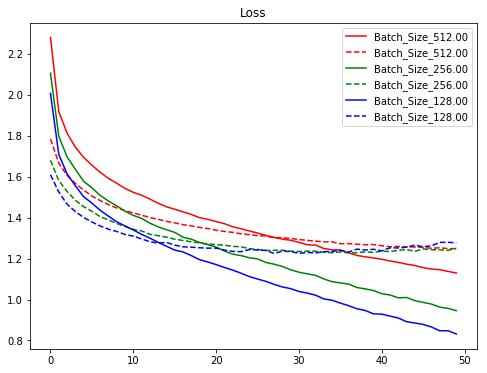

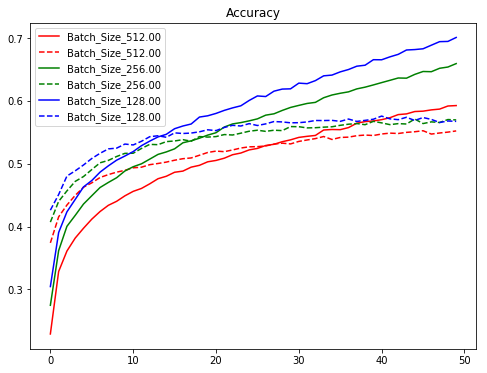

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()